In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Get the Dataset into dataframes
path_main = 'C:/Users/ramon/Downloads' #../Resources
confirmedcases_df = pd.read_csv(path_main + '/conposcovidloc.csv')
outbreaks_df =  pd.read_csv(path_main + '/ongoing_outbreaks_phu (2).csv')
vaccinedata_df =  pd.read_csv(path_main + '/vaccines_by_age_phu (2).csv')

### Find out the amount of data we have by date in the years the 2020 and 2021

In [55]:
# group data by date
date_cc = confirmedcases_df.groupby(['Accurate_Episode_Date']).Accurate_Episode_Date.count()
date_ob = outbreaks_df.groupby(['date']).date.count()
date_vd = vaccinedata_df.groupby(['Date']).Date.count()
# concat into a dataframe
dates_df = pd.concat([date_cc,date_ob,date_vd], axis = 1, keys = ["Confirmed cases","Outbreaks","Vaccine"])

# indicate presence of data with value 1
dates_df["Confirmed cases"].loc[~dates_df["Confirmed cases"].isnull()] = 1
dates_df["Outbreaks"].loc[~dates_df["Outbreaks"].isnull()] = 1
dates_df["Vaccine"].loc[~dates_df["Vaccine"].isnull()] = 1

dates_df

,Confirmed cases,Outbreaks,Vaccine
2019-05-30,1.0,NaN,NaN
2019-11-20,1.0,NaN,NaN
2020-01-01,1.0,NaN,NaN
2020-01-05,1.0,NaN,NaN
2020-01-10,1.0,NaN,NaN
...,...,...,...
2021-11-02,1.0,1.0,1.0
2021-11-03,1.0,1.0,1.0
2021-11-04,NaN,1.0,1.0
2021-11-05,NaN,1.0,1.0


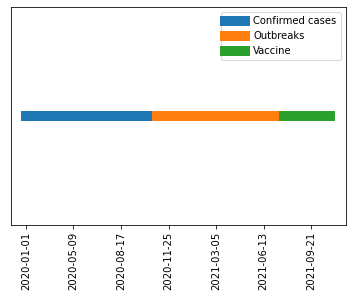

In [118]:
# plot new dataframe to compare the proportion of date in the three datasets 
mask = (dates_df.index >= '2020-01-01') & (dates_df.index < '2021-11-01')
dates_df = dates_df.loc[mask]
dates_df.plot(lw=10,rot=90)
plt.gca().axes.get_yaxis().set_visible(False)


### Cases by day

<AxesSubplot:xlabel='Accurate_Episode_Date'>

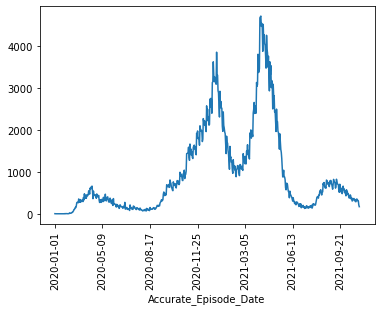

In [60]:
# plot number of cases per day.
mask = (date_cc.index >= '2020-01-01') & (date_cc.index < '2021-11-01')
date_cc = date_cc.loc[mask]
date_cc.plot(rot=90)

In [61]:
confirmedcases_df[]

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2019-05-30,2020-05-05,2020-05-05,2020-05-03,50s,FEMALE,CC,Resolved,NaN,2260,Simcoe Muskoka District Health Unit,15 Sperling Drive,Barrie,L4M 6K9,www.simcoemuskokahealth.org,44.410713,-79.686306
1,2,2019-11-20,2020-10-21,2020-11-21,2019-11-20,20s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,4913,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
2,3,2020-01-01,2020-04-24,2020-04-24,2020-04-23,80s,MALE,NO KNOWN EPI LINK,Resolved,NaN,2234,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815
3,4,2020-01-01,2020-05-17,2020-05-17,2020-05-15,50s,MALE,CC,Resolved,NaN,2265,"Region of Waterloo, Public Health",99 Regina Street South,Waterloo,N2J 4V3,www.regionofwaterloo.ca,43.462876,-80.520913
4,5,2020-01-01,2021-05-26,2021-03-31,2021-03-28,UNKNOWN,MALE,TRAVEL,Resolved,NaN,2263,Timiskaming Health Unit,"247 Whitewood Avenue, Unit 43",New Liskeard,P0J 1P0,www.timiskaminghu.com,47.509284,-79.681632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601519,601520,2021-11-03,2021-11-03,2021-11-03,2021-11-03,50s,MALE,MISSING INFORMATION,Not Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
601520,601521,2021-11-03,2021-11-03,2021-11-03,2021-11-03,70s,MALE,MISSING INFORMATION,Not Resolved,NaN,2233,Grey Bruce Health Unit,101 17th Street East,Owen Sound,N4K 0A5,www.publichealthgreybruce.on.ca/,44.576196,-80.940980
601521,601522,2021-11-03,2021-11-03,2021-11-03,2021-11-03,80s,FEMALE,MISSING INFORMATION,Not Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
601522,601523,2021-11-03,2021-11-03,2021-11-03,2021-11-03,<20,FEMALE,MISSING INFORMATION,Not Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


### Exploring PHUs

In [62]:
#explore how many PHU is in the dataset 
phu_df = pd.DataFrame(
    confirmedcases_df.groupby( 
                            ['Reporting_PHU_ID', 
                            'Reporting_PHU',           
                            'Reporting_PHU_Address',  
                            'Reporting_PHU_City',
                            'Reporting_PHU_Postal_Code',
                            'Reporting_PHU_Website',
                            'Reporting_PHU_Latitude',
                            'Reporting_PHU_Longitude']
).Row_ID.count()).reset_index()

phu_df.head(5)

,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Row_ID
0,2226,Algoma Public Health Unit,294 Willow Avenue,Sault Ste. Marie,P6B 0A9,www.algomapublichealth.com,46.532373,-84.314836,552
1,2227,Brant County Health Unit,194 Terrace Hill Street,Brantford,N3R 1G7,www.bchu.org/,43.151811,-80.274374,4638
2,2230,Durham Region Health Department,605 Rossland Road East,Whitby,L1N 0B2,www.durham.ca/en/health-and-wellness/health-an...,43.898605,-78.940341,27466
3,2233,Grey Bruce Health Unit,101 17th Street East,Owen Sound,N4K 0A5,www.publichealthgreybruce.on.ca/,44.576196,-80.940980,2368
4,2234,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815,3040


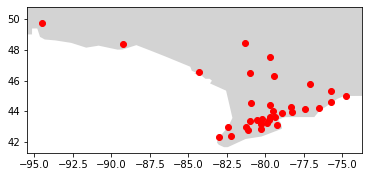

In [116]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Canada
ax = world[world.name == 'Canada'].plot(color="lightgrey")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

#zooming 
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx - 1, maxx + 1)
ax.set_ylim(miny - 1, maxy + 1)

plt.show()